# ERC-4626: all vaults on a particular chain

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 23,453 vaults in the database and 13,073,783 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 3,036,583 price rows across all vaults on Arbitrum.


chain                                     address  \
timestamp                                                                
2024-01-11 09:13:06  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 10:13:15  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 11:13:20  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 12:13:25  42161  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   

                     block_number  share_price  total_assets  total_supply  \
timestamp                                                                    
2024-01-11 09:13:06     169318721         1.00          1.00          1.00   
2024-01-11 10:13:15     169333121         1.00          1.00          1.00   
2024-01-11 11:13:20     169347521         1.00          1.00          1.00   
2024-01-11 12:13:25     169361921         1.00          1.00          1.00   

                     performance_fee  management_fee errors  \
timestamp                                                     
2024-01-11 09:13:06              NaN             NaN          
2024-01-11 10:13:15              NaN             NaN          
2024-01-11 11:13:20              NaN             NaN          
2024-01-11 12:13:25              NaN             NaN          

                                                                   id  \
timestamp                                                               
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 10:13:15  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 11:13:20  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   
2024-01-11 12:13:25  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776   

                                             name  event_count  \
timestamp                                                        
2024-01-11 09:13:06  Staked USDA (Arbitrum) #6327       126847   
2024-01-11 10:13:15  Staked USDA (Arbitrum) #6327       126847   
2024-01-11 11:13:20  Staked USDA (Arbitrum) #6327       126847   
2024-01-11 12:13:25  Staked USDA (Arbitrum) #6327       126847   

                               protocol  raw_share_price  pct_change_prev  \
timestamp                                                                   
2024-01-11 09:13:06  <unknown ERC-4626>             1.00              NaN   
2024-01-11 10:13:15  <unknown ERC-4626>             1.00             0.00   
2024-01-11 11:13:20  <unknown ERC-4626>             1.00             0.00   
2024-01-11 12:13:25  <unknown ERC-4626>             1.00             0.00   

                     pct_change_next  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2024-01-11 09:13:06             0.00        0.00                 1.00   
2024-01-11 10:13:15             0.00        0.00                 1.00   
2024-01-11 11:13:20             0.00        0.00                 1.00   
2024-01-11 12:13:25             0.00        0.00                 1.00   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2024-01-11 09:13:06                   0.02                True  
2024-01-11 10:13:15                   0.02                True  
2024-01-11 11:13:20                   0.02                True  
2024-01-11 12:13:25                   0.02                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 296 vaults out of total of 5,589 vaults on chain Arbitrum, having 719,307 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4                   NAV                          218852.566660400704649665
5              Protocol                                 <unknown ERC-4626>
6              Mgmt fee                                               None
7              Perf fee                                               None
8           Deposit fee                                               0.00
9          Withdraw fee                                               0.00
10               Shares                          157940.074220509572793378
11           First seen                                2022-08-26 11:27:33
12              Lock up                                               None
13      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
14  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
15         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.5,  # 50% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/131 [00:00<?, ?it/s]

Cleaning metrics for 131 vaults
Vault entries with too high NAV values filtered out: 0
Vault entries with too small ATH NAV values filtered out: 7
Vaults abnormally high returns: 7
Vault entries with too few deposit and redeem events (min 25) filtered out: 13
Calculated lifetime metrics for 103 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name  lifetime_return  lifetime_return_net  cagr  cagr_net  \
118  KITSUNE            -0.25                  NaN -0.31       NaN   
60    HYPE++             0.39                 0.32  0.43      0.35   

     three_months_returns  three_months_returns_net  three_months_cagr  \
118                  0.03                       NaN               0.13   
60                   0.04                      0.03               0.18   

     three_months_cagr_net  three_months_sharpe  three_months_sharpe_net  \
118                    NaN                 3.00                     3.00   
60                    0.14                 2.76                     2.76   

     three_months_volatility  one_month_returns  one_month_returns_net  \
118                     0.01               0.03                    NaN   
60                      0.02               0.03                   0.02   

     one_month_cagr  one_month_cagr_net denomination     chain     peak_nav  \
118            0.45                 NaN       USDC.e  Arbitrum   155,440.36   
60             0.37                0.29       USDC.e  Arbitrum 6,241,538.82   

     current_nav  years  mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
118    84,028.00   0.76       NaN       NaN         0.00          0.00   
60  3,541,406.72   0.92      0.00      0.20         0.00          0.00   

        fee_label           lockup  event_count            protocol  \
118         ? / ?              NaT          192  <unknown ERC-4626>   
60   0.0% / 20.0% 30 days 16:00:00          224          D2 Finance   

                               risk  \
118  VaultTechnicalRisk.blacklisted   
60    VaultTechnicalRisk.extra_high   

                                                   id          start_date  \
118  42161-0xe5a4f22fcb8893ba0831babf9a15558b5e83446f 2025-09-24 07:02:23   
60   42161-0x75288264fdfea8ce68e6d852696ab1ce2f3e5004 2025-09-24 07:02:23   

               end_date  
118 2025-10-24 07:01:10  
60  2025-10-24 07:01:10

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 99 vaults.
Formatted data for 98 vaults.
Top 98 vaults by 1 month annualised return are: HYPE++, Plutus Hedge Token, Silo Finance Borrowable USDC Deposit in ARB Silo, Harvest: USDC Vault (0x2d5F), USDn2, USDC-2 yVault, gmUSDC, Peapods Interest Bearing USDC - 25, Staked USDai, Harvest: USDC Vault (0x5E77), Nashpoint DeFi & RWA Fund, Yield Chasing Silo USDC, Silo Finance Borrowable USDC Deposit, SiloId: 146, Concrete USDC MultiSig Strategy, Autopilot USDC Arbitrum, Clearstar High Yield USDC, LazyVault_LowerRisk_USDC, Gains Network USDC, Yield Chasing crvUSD, Yield Chasing USDC, Silo Finance Borrowable USDC Deposit, SiloId: 145, Clearstar USDC Reactor, MEV Capital USDC, Harvest: USDC Vault (0x4A8e), autoSUSDai, Hyperithm USDC, Dolomite: USDT, Yearn Degen USDC, Dolomite: USDC, Saving USX, Gauntlet USDC Core, Staked USDX, Prime Tether USD, BasisOS USDC-LINK Hyperliquid, K3 Capital USDai USDC, Euler Arbitrum Yield USDC, Steakhouse Prime USDC, 

Name  \
#                                                       
1                                              HYPE++   
2                                  Plutus Hedge Token   
3    Silo Finance Borrowable USDC Deposit in ARB Silo   
4                        Harvest: USDC Vault (0x2d5F)   
5                                               USDn2   
6                                       USDC-2 yVault   
7                                              gmUSDC   
8                  Peapods Interest Bearing USDC - 25   
9                                        Staked USDai   
10                       Harvest: USDC Vault (0x5E77)   
11                          Nashpoint DeFi & RWA Fund   
12                            Yield Chasing Silo USDC   
13  Silo Finance Borrowable USDC Deposit, SiloId: 146   
14                    Concrete USDC MultiSig Strategy   
15                            Autopilot USDC Arbitrum   
16                          Clearstar High Yield USDC   
17                           LazyVault_LowerRisk_USDC   
18                                 Gains Network USDC   
19                               Yield Chasing crvUSD   
20                                 Yield Chasing USDC   
21  Silo Finance Borrowable USDC Deposit, SiloId: 145   
22                             Clearstar USDC Reactor   
23                                   MEV Capital USDC   
24                       Harvest: USDC Vault (0x4A8e)   
25                                         autoSUSDai   
26                                     Hyperithm USDC   
27                                     Dolomite: USDT   
28                                   Yearn Degen USDC   
29                                     Dolomite: USDC   
30                                         Saving USX   
31                                 Gauntlet USDC Core   
32                                        Staked USDX   
33                                   Prime Tether USD   
34                      BasisOS USDC-LINK Hyperliquid   
35                              K3 Capital USDai USDC   
36                          Euler Arbitrum Yield USDC   
37                              Steakhouse Prime USDC   
38                         Steakhouse High Yield USDC   
39                                Euler Arbitrum USDC   
40                                    Euler Earn USDC   
41                         Wrapped Aave Arbitrum USDT   
42                          Static Aave Arbitrum USDT   
43                                      Yearn OG USDC   
44                                   Spark USDC Vault   
45                          Wrapped Aave Arbitrum GHO   
46                                 Frontier Theo USDC   
47                           LazyVault_LowerRisk_USDT   
48                             Curve Vault for crvUSD   
49                   Crypto.com Defi Wallet AAVE USDT   
50                                    Fluid Gho Token   
51                                Gauntlet USDC Prime   
52                         Static Aave Arbitrum USDCn   
53                        Wrapped Aave Arbitrum USDCn   
54                                   Fluid Tether USD   
55                                        dForce USDC   
56               Crypto.com Defi Wallet Compound USDC   
57                   Crypto.com Defi Wallet AAVE USDC   
58                                     Fluid USD Coin   
59                                             gmUSDC   
60                                  Gains Network DAI   
61                             K3 Capital USDai USDT0   
62                         fija Strategy USDC AaveOpt   
63                                        Staked EURA   
64                    Concrete USDC MultiSig Strategy   
65                             Curve Vault for crvUSD   
66                                          autoUSDai   
67   Fraxlend Interest Bearing FRAX (Wrapped BTC) - 3   
68                             Curve Vault for crvUSD   
69                             Curve Vault for crvUSD   
70

# Top vault equity curves

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included


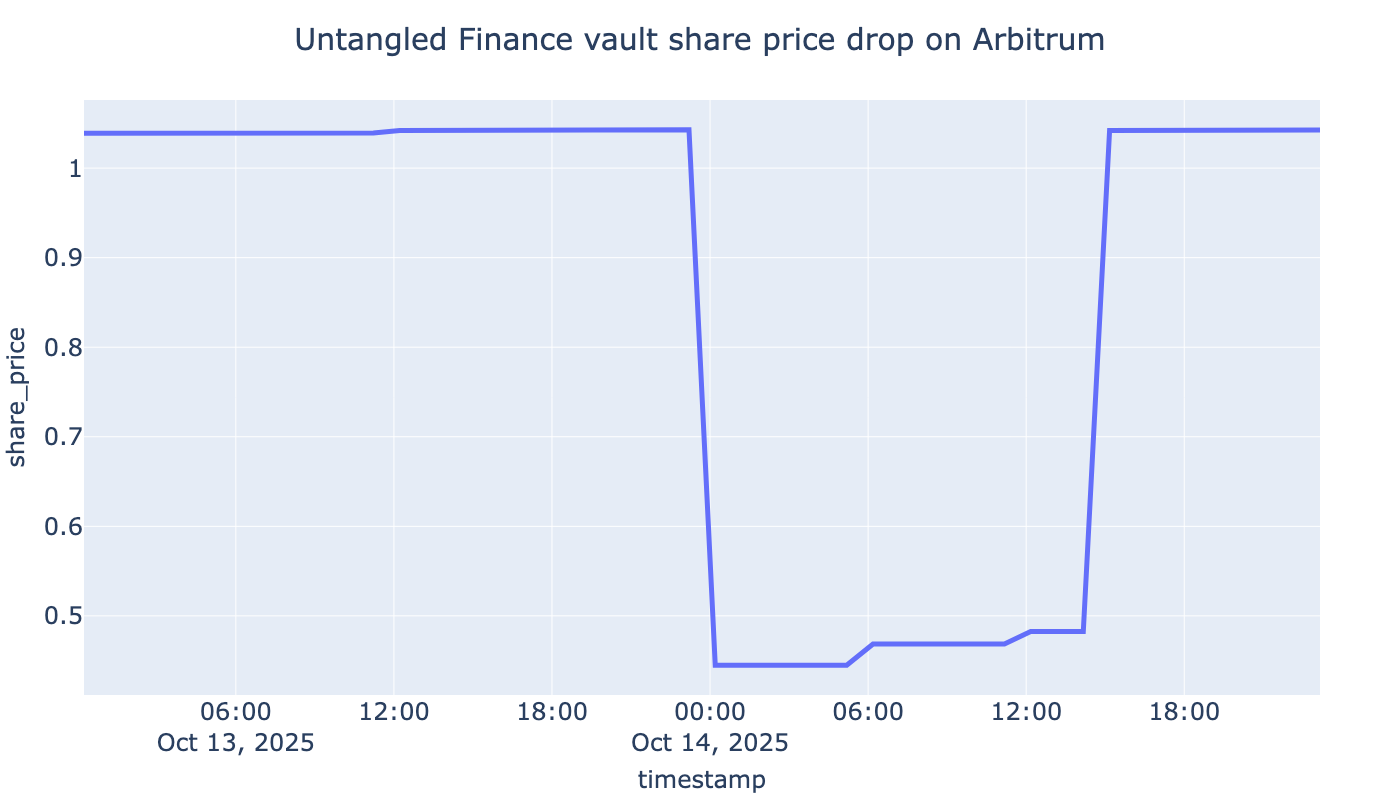

In [ ]:
from plotly import express as px

# Looks like Untangled Finance has a real bug in onchain data
# Block 389264321
# Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# Vault share price drops 1.05 -> 0.44
# Our share price cleaning cannot fix this big gab
df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# display(df)

fig = px.line(
    df,
    x=df.index,
    y="share_price",
    title="Untangled Finance vault share price drop on Arbitrum",
)
fig.show()

fig = px.line(
    df,
    x=df.index,
    y="returns_1h",
    title="Untangled Finance vault share price drop on Arbitrum",
)
fig.show()

Skipping vault 42161-0x0b2b2b2076d95dda7817e785989fe353fe955ef9: Staked USDai due to missing fee data
Skipping vault 42161-0x4785df09013c1c492504fb4688ed3f320c964c9c: Concrete USDC MultiSig Strategy due to missing fee data
Skipping vault 42161-0x6ca200319a0d4127a7a473d6891b86f34e312f42: Nashpoint DeFi & RWA Fund due to missing fee data
Skipping vault 42161-0xacb7432a4bb15402ce2afe0a7c9d5b738604f6f9: Silo Finance Borrowable USDC Deposit, SiloId: 146 due to missing fee data
Skipping vault 42161-0xd15a07a4150b0c057912fe883f7ad22b97161591: Peapods Interest Bearing USDC - 25 due to missing fee data
Skipping vault 42161-0xe5a4f22fcb8893ba0831babf9a15558b5e83446f: KITSUNE due to missing fee data


Harvest: USDC Vault (0x2d5F)  USDn2  Plutus Hedge Token  \
timestamp                                                             
2025-07-29                          0.00   0.00                0.00   
2025-07-30                          0.00   0.02                0.00   
2025-07-31                          0.00   0.04                0.00   
2025-08-01                          0.00   0.02                0.00   
2025-08-02                          0.00   0.02                0.00   
2025-08-03                          0.00   0.04                0.00   
2025-08-04                          0.00   0.15                0.00   
2025-08-05                          0.00   0.11                0.00   
2025-08-06                          0.00   0.04                3.60   
2025-08-07                          0.00   0.09                3.60   
2025-08-08                          0.00   0.15                3.60   
2025-08-09                          0.00   0.20                3.60   
2025-08-10                          0.00   0.20                3.60   
2025-08-11                          0.00   0.22                3.60   
2025-08-12                          0.00   0.29                3.60   
2025-08-13                          0.00   0.24                3.60   
2025-08-14                          0.00   0.31                3.60   
2025-08-15                          0.00   0.31                3.60   
2025-08-16                          0.00   0.33                3.60   
2025-08-17                          0.00   0.35                3.60   
2025-08-18                          0.00   0.41                3.60   
2025-08-19                          0.00   0.45                3.60   
2025-08-20                          0.00   0.49                3.60   
2025-08-21                          0.00   0.51                3.60   
2025-08-22                          0.00   0.58                3.60   
2025-08-23                          0.00   0.61                3.60   
2025-08-24                          0.00   0.66                3.60   
2025-08-25                          0.00   0.69                3.60   
2025-08-26                          0.00   0.74                3.60   
2025-08-27                          0.00   0.75                3.60   
2025-08-28                          0.00   0.77                3.60   
2025-08-29                          0.00   0.77                3.60   
2025-08-30                          0.00   0.76                3.60   
2025-08-31                          0.00   0.78                3.60   
2025-09-01                          0.00   0.77                3.60   
2025-09-02                          0.00   0.77                3.60   
2025-09-03                          0.00   0.79                3.60   
2025-09-04                          0.00   0.80                3.60   
2025-09-05                          0.00   0.81                3.60   
2025-09-06                          0.00   0.83                3.60   
2025-09-07                          0.00   0.80                3.60   
2025-09-08                          0.00   0.84                6.20   
2025-09-09                          0.00   0.90                6.20   
2025-09-10                          0.00   0.93                6.20   
2025-09-11                          0.04   0.94                6.20   
2025-09-12                          0.07   0.97                6.20   
2025-09-13                          0.13   1.02                6.20   
2025-09-14                          0.20   1.06                6.20   
2025-09-15                          0.26   1.07                6.20   
2025-09-16                          0.31   1.11                6.20   
2025-09-17                          0.39   1.21                6.20   
2025-09-18                          0.46   1.17                6.20   
2025-09-19                          0.51   1.17                6.20   
2025-09-20                          0.57   1.17                6.20   
2025-09-21                          

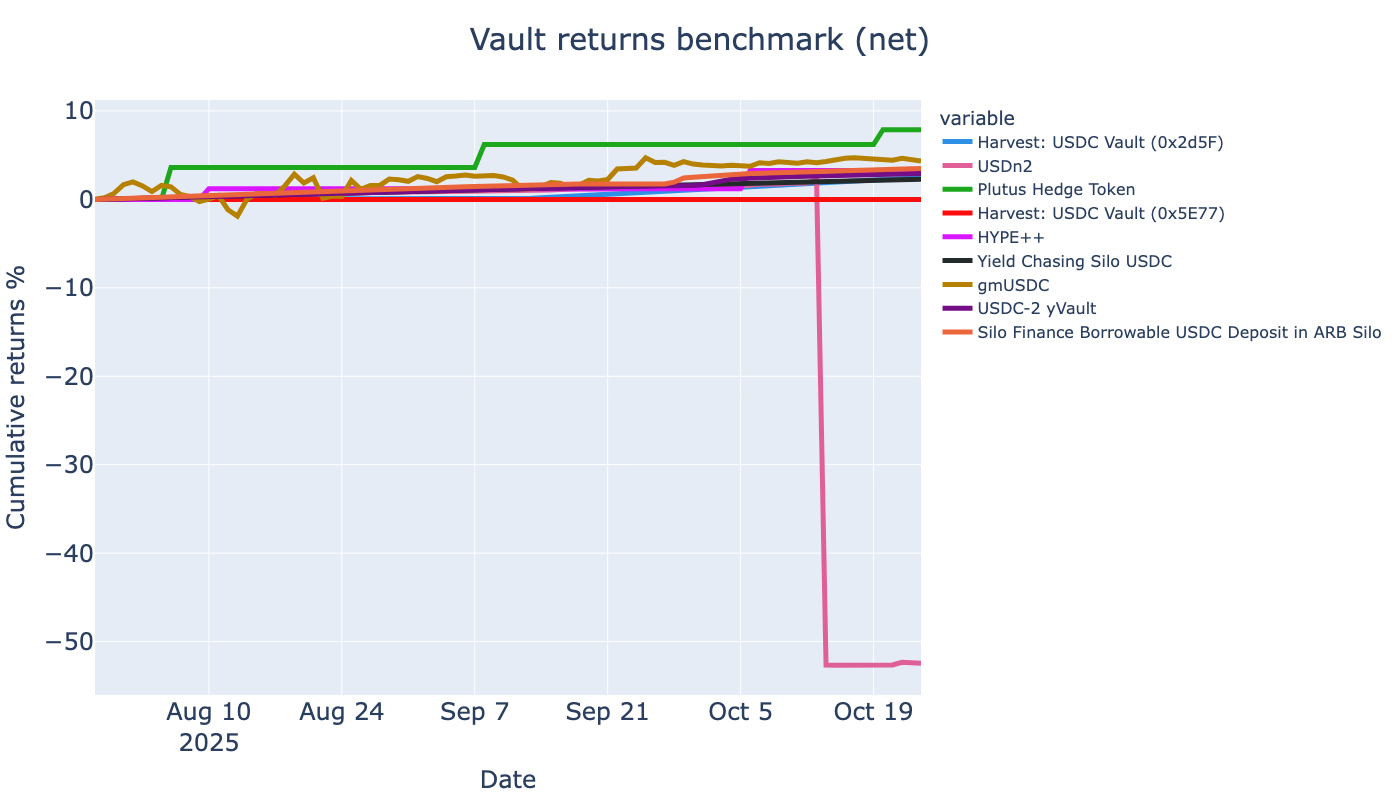

In [8]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

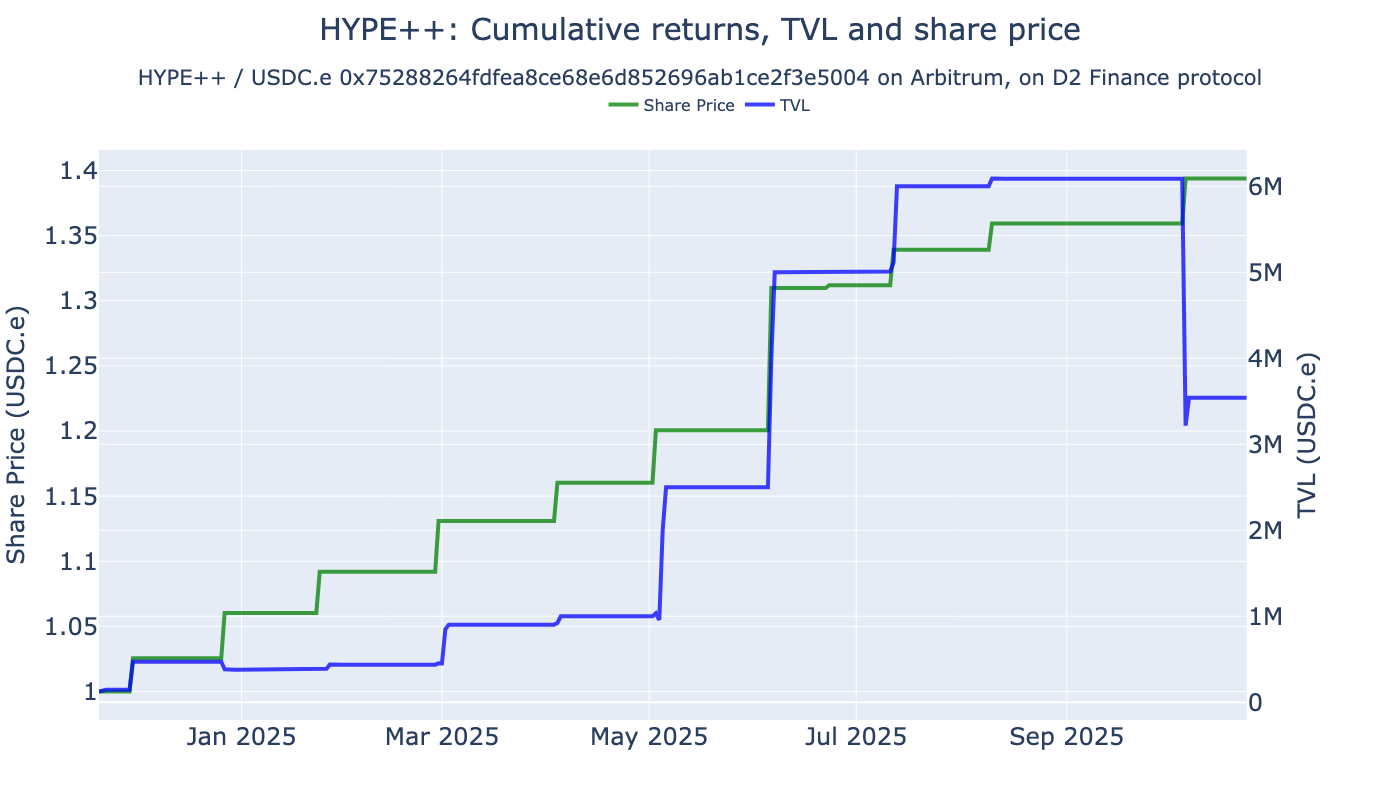

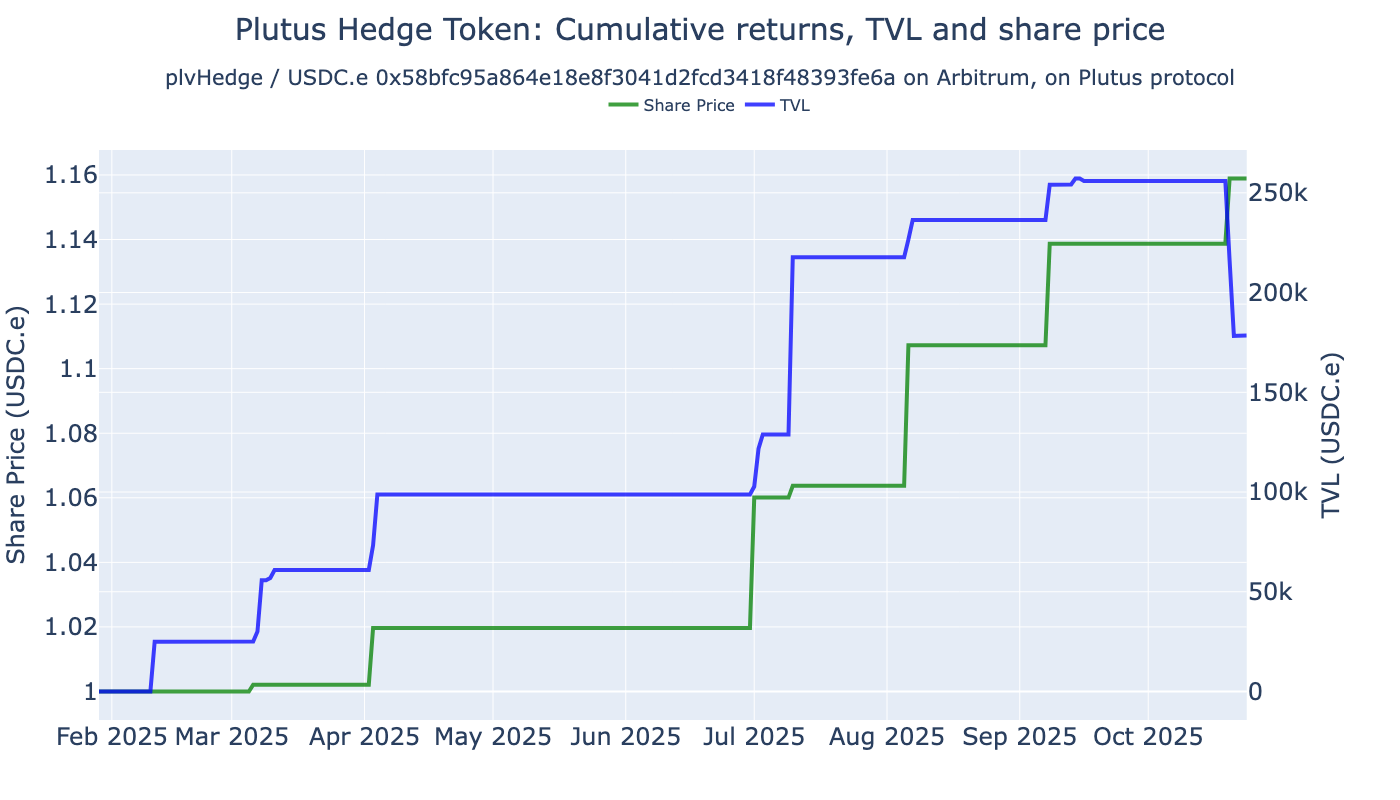

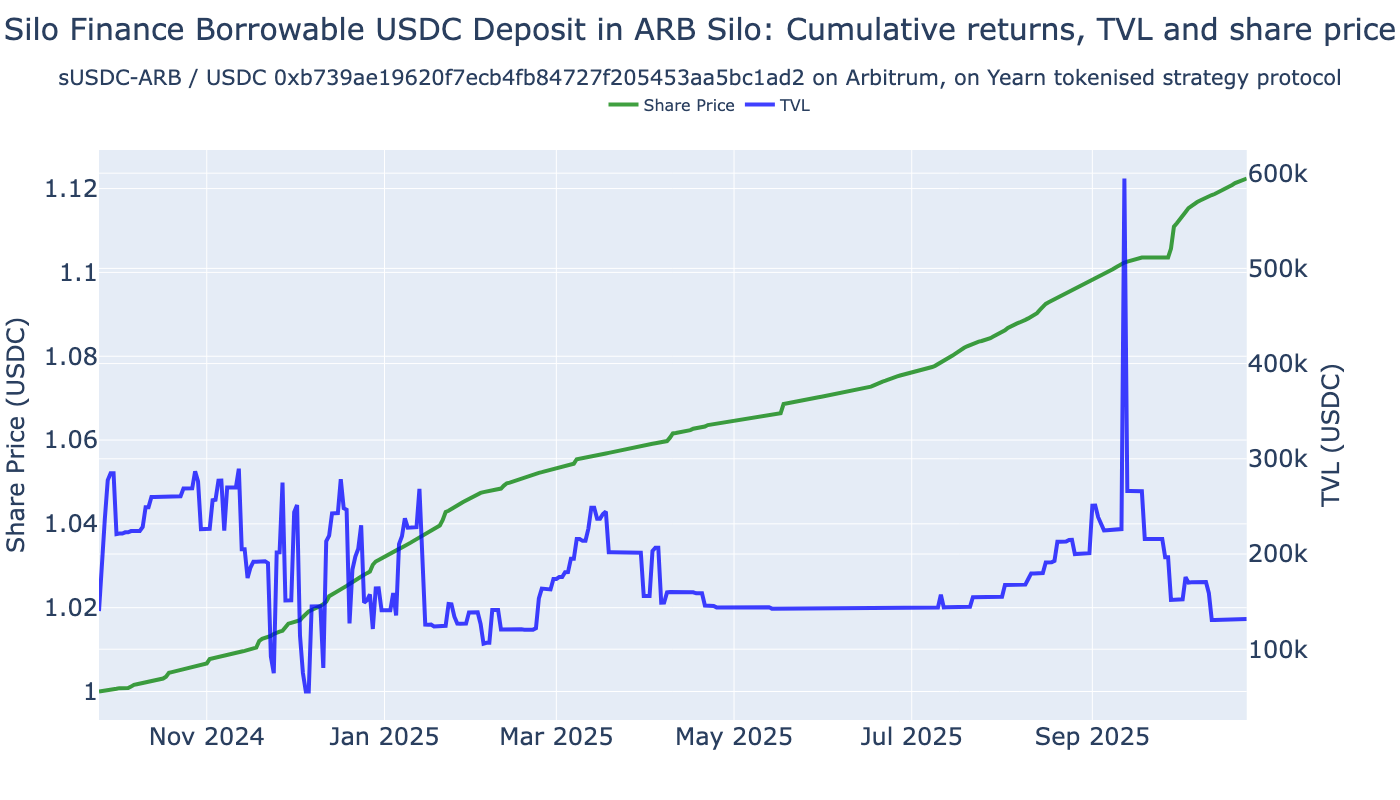

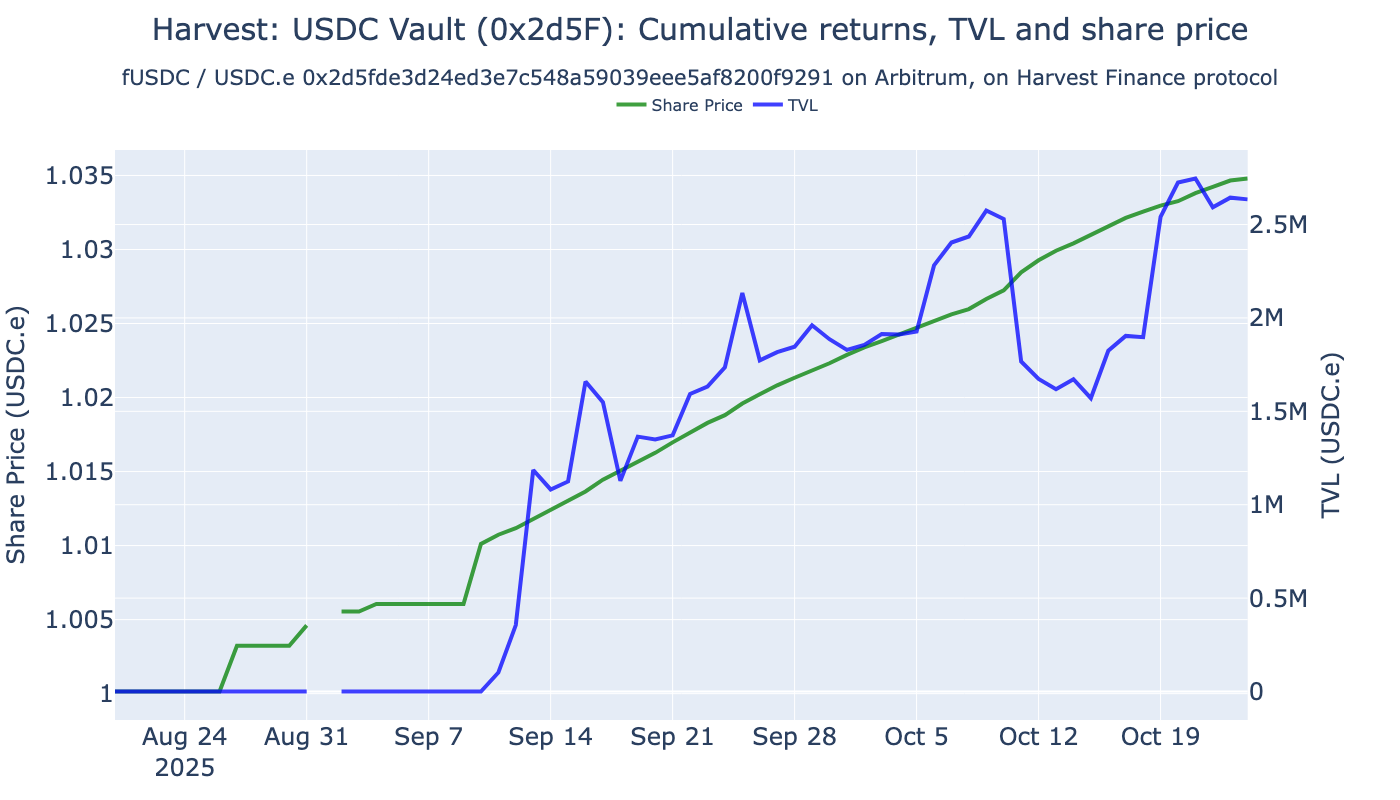

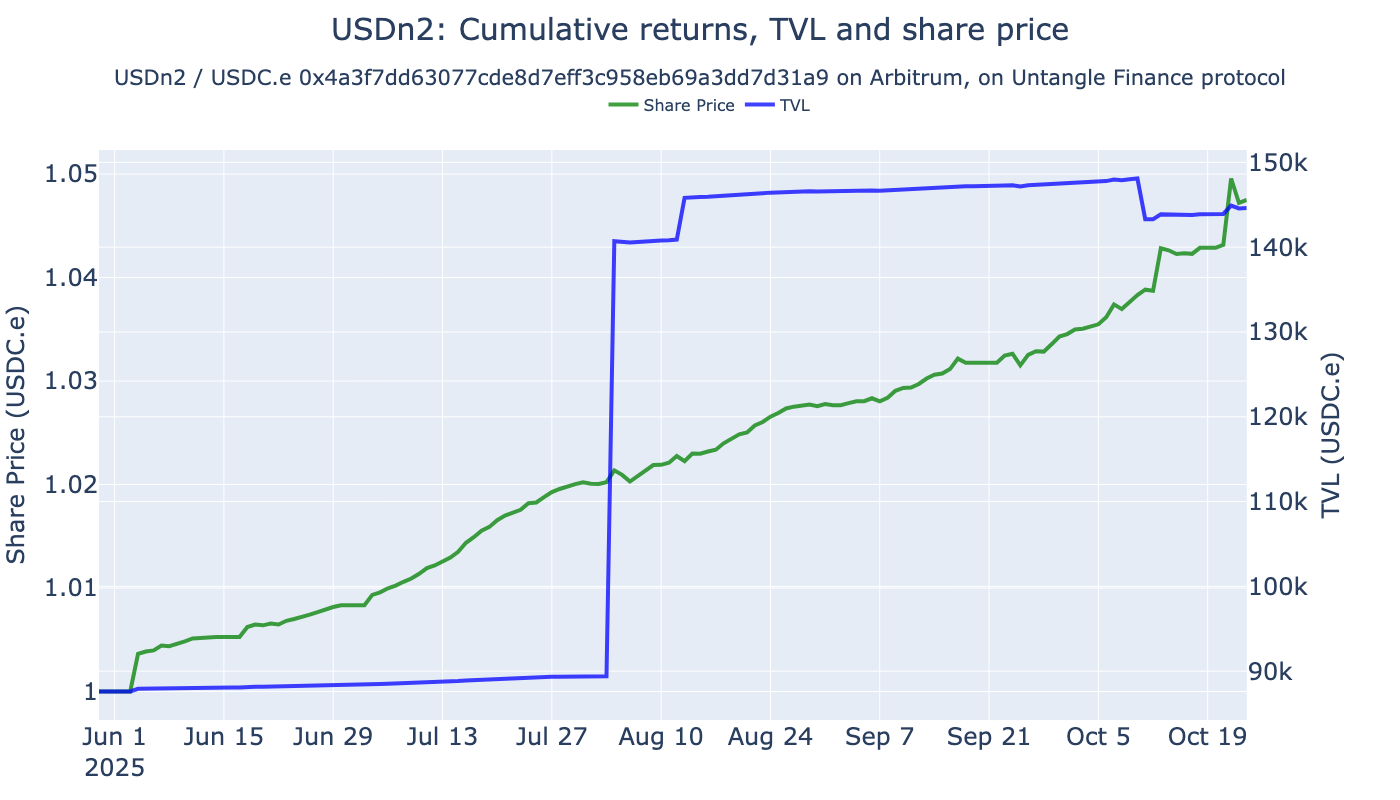

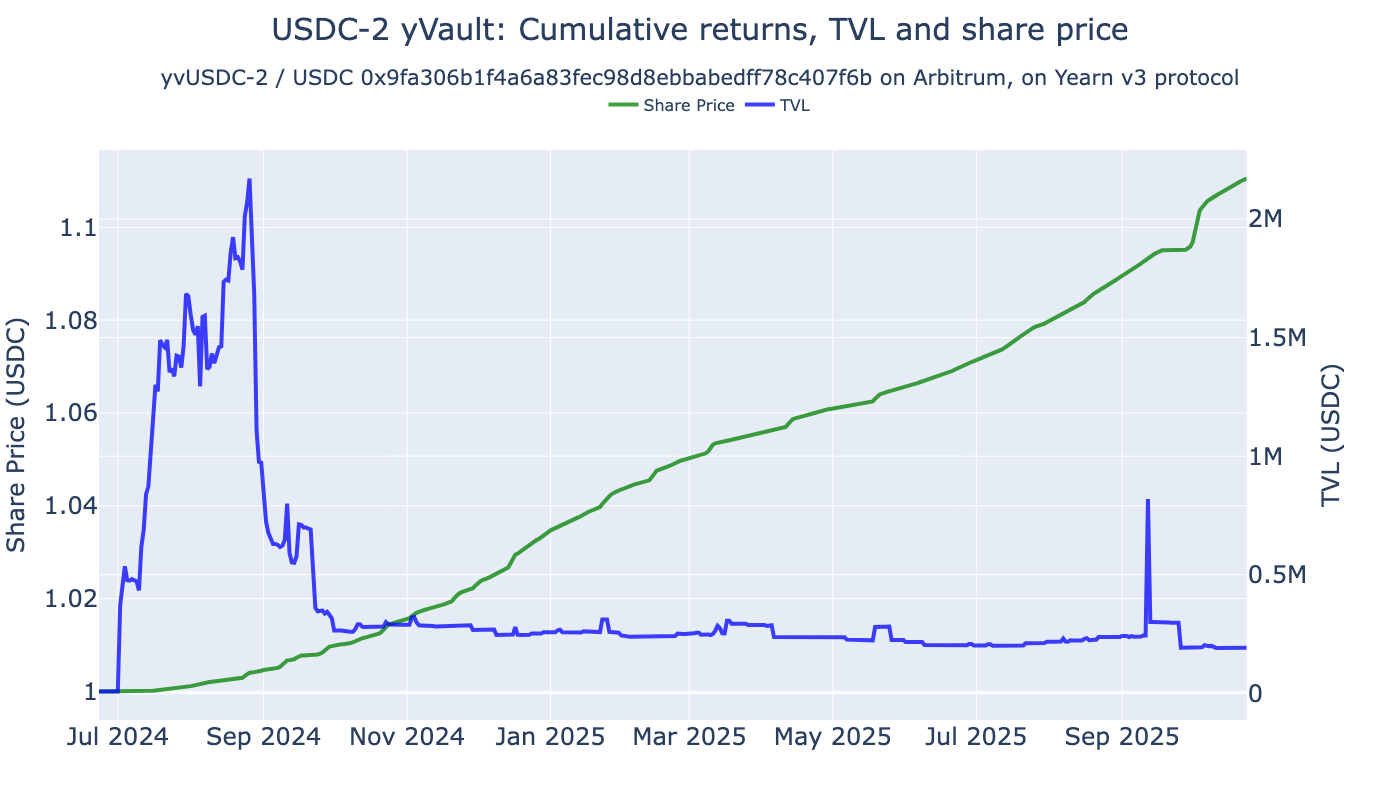

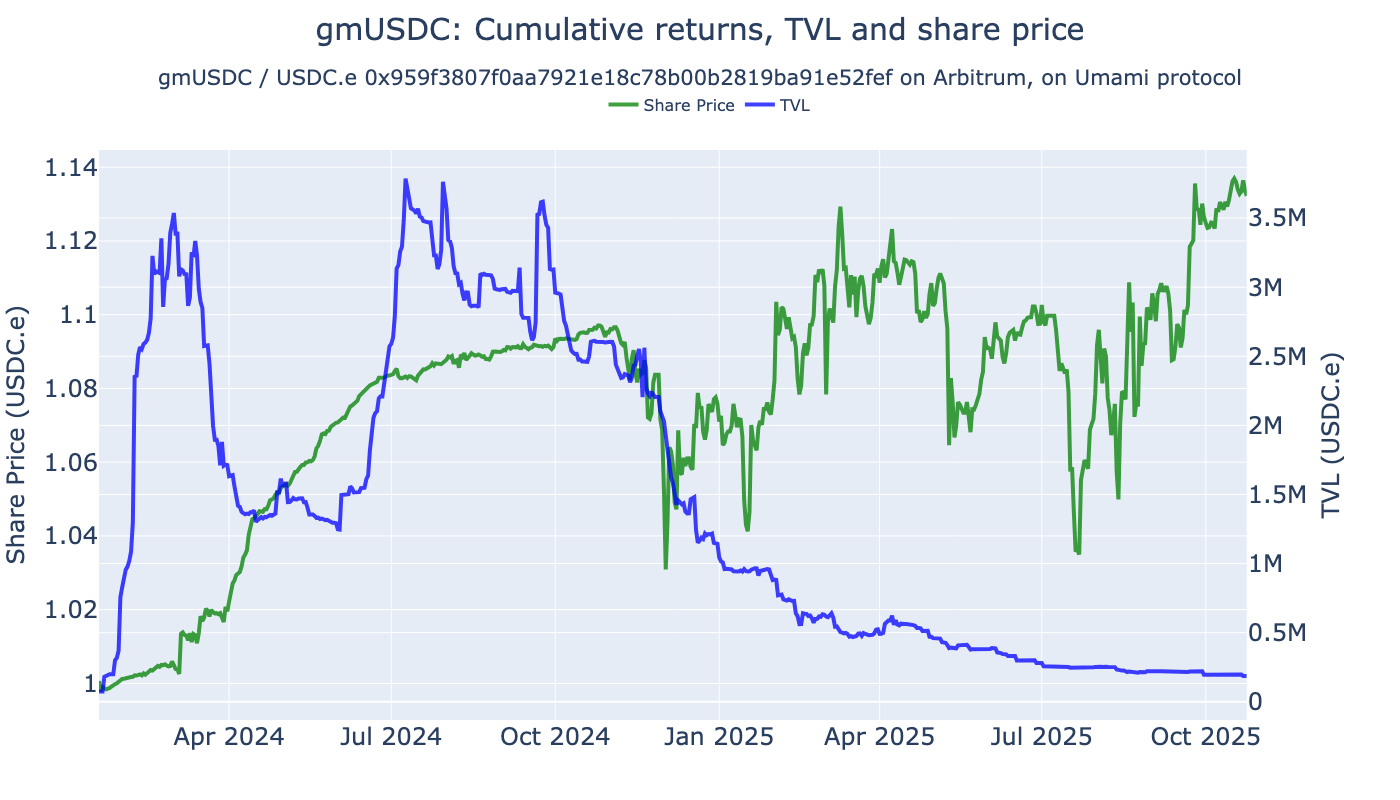

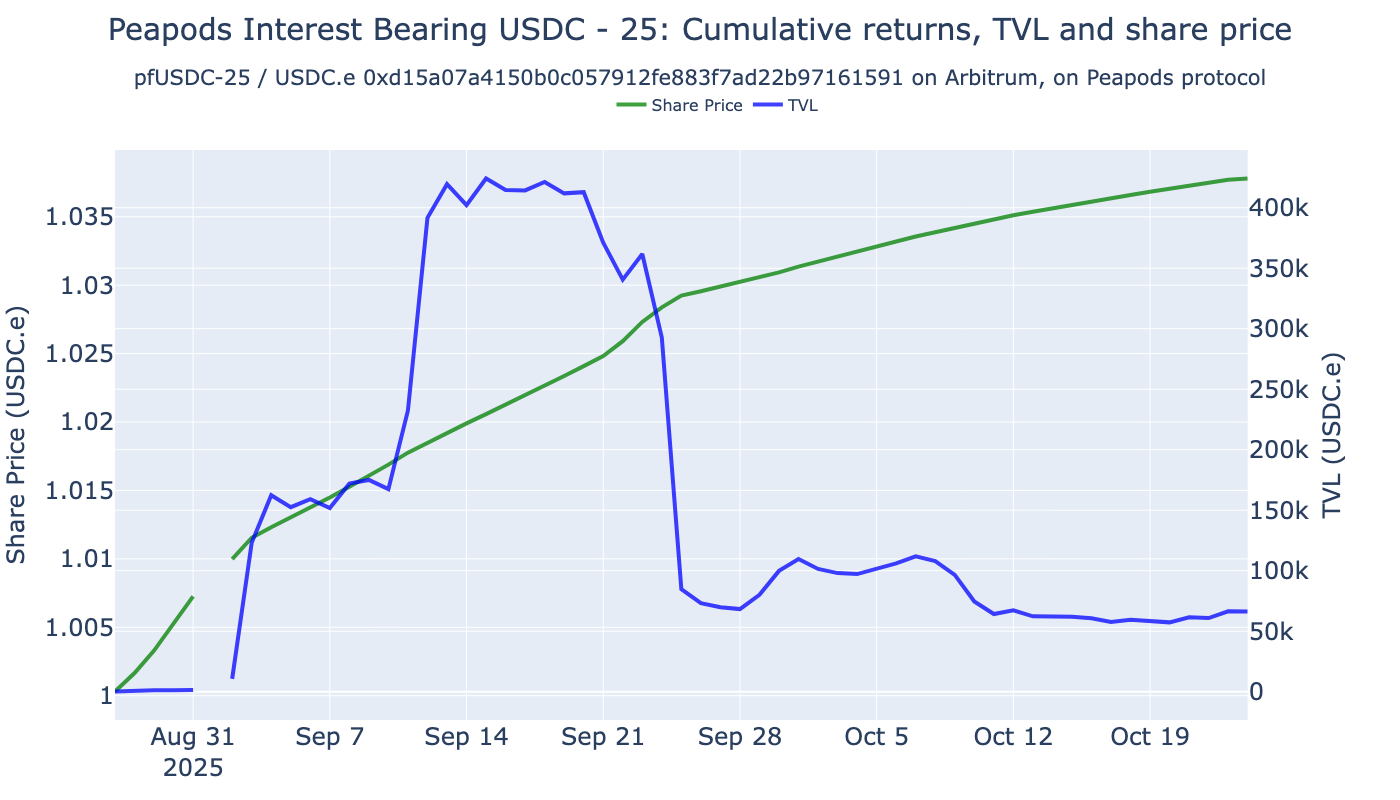

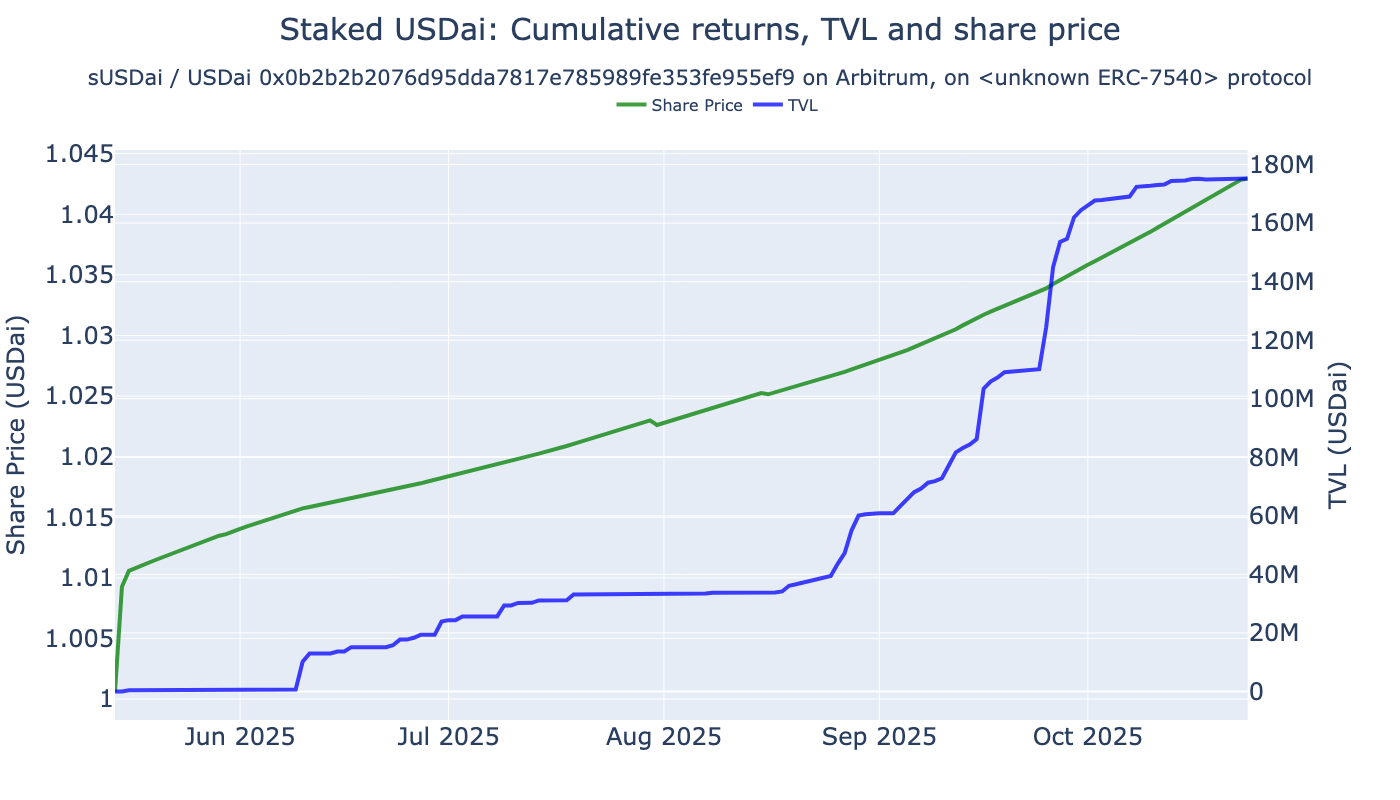

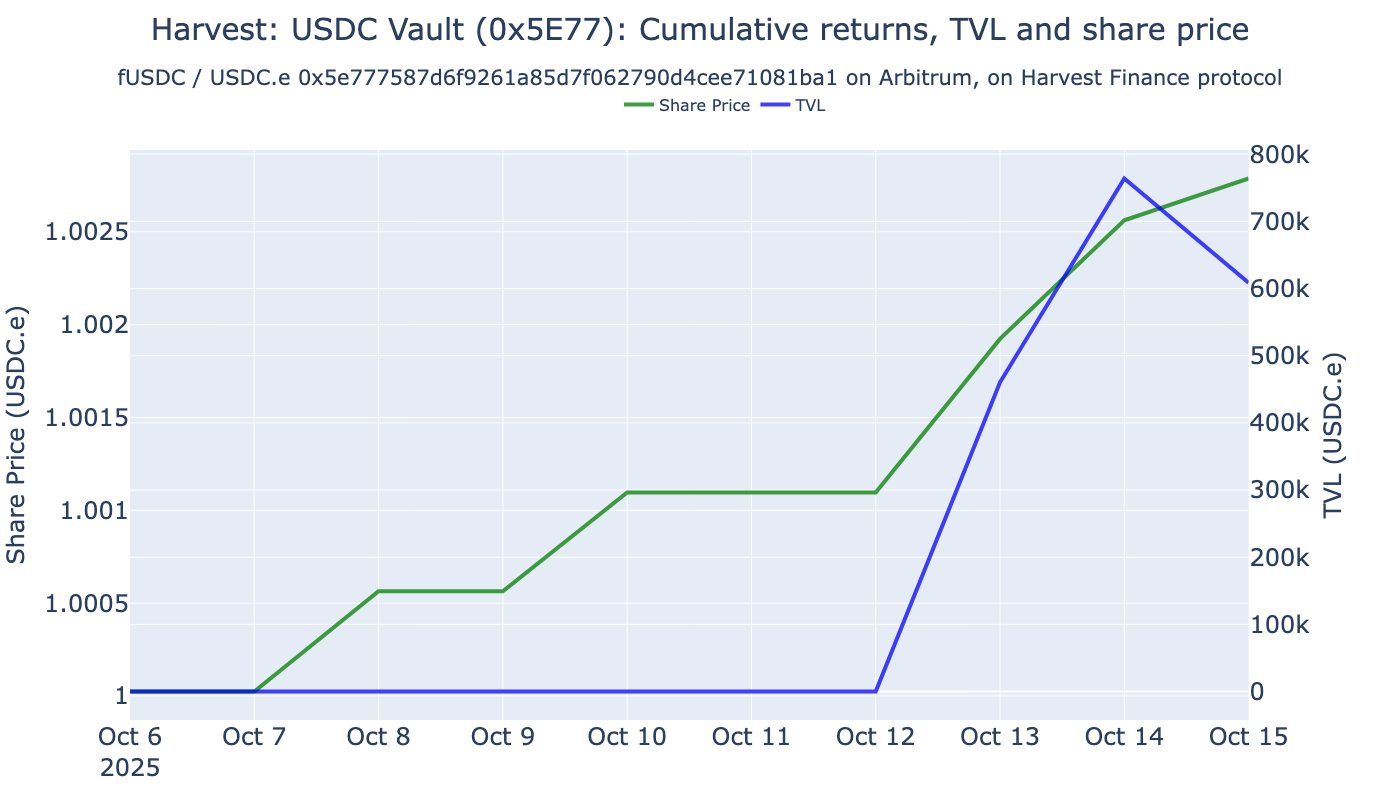

In [9]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

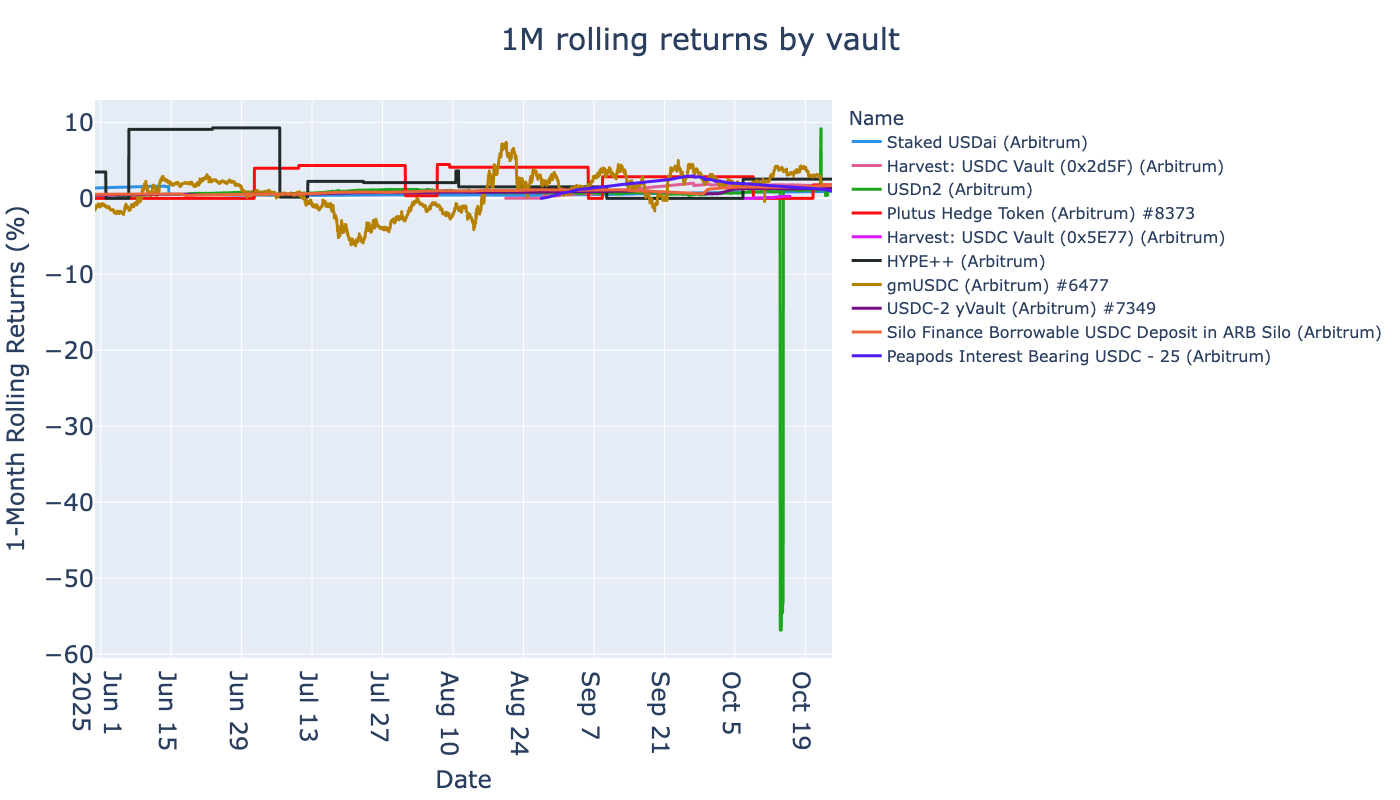

In [10]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [11]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name  \
#                                                       
1                                              HYPE++   
2                                  Plutus Hedge Token   
3    Silo Finance Borrowable USDC Deposit in ARB Silo   
4                        Harvest: USDC Vault (0x2d5F)   
5                                               USDn2   
6                                       USDC-2 yVault   
7                                              gmUSDC   
8                  Peapods Interest Bearing USDC - 25   
9                                        Staked USDai   
10                       Harvest: USDC Vault (0x5E77)   
11                          Nashpoint DeFi & RWA Fund   
12                            Yield Chasing Silo USDC   
13  Silo Finance Borrowable USDC Deposit, SiloId: 146   
14                    Concrete USDC MultiSig Strategy   
15                            Autopilot USDC Arbitrum   
16                          Clearstar High Yield USDC   
17                           LazyVault_LowerRisk_USDC   
18                                 Gains Network USDC   
19                               Yield Chasing crvUSD   
20                                 Yield Chasing USDC   
21  Silo Finance Borrowable USDC Deposit, SiloId: 145   
22                             Clearstar USDC Reactor   
23                                   MEV Capital USDC   
24                       Harvest: USDC Vault (0x4A8e)   
25                                         autoSUSDai   
26                                     Hyperithm USDC   
27                                     Dolomite: USDT   
28                                   Yearn Degen USDC   
29                                     Dolomite: USDC   
30                                         Saving USX   
31                      Avantgarde USDC Core Arbitrum   
32                                 Gauntlet USDC Core   
33                                        Staked USDX   
34                                   Prime Tether USD   
35                      BasisOS USDC-LINK Hyperliquid   
36                              K3 Capital USDai USDC   
37                          Euler Arbitrum Yield USDC   
38                              Steakhouse Prime USDC   
39                         Steakhouse High Yield USDC   
40                                Euler Arbitrum USDC   
41                                    Euler Earn USDC   
42                         Wrapped Aave Arbitrum USDT   
43                          Static Aave Arbitrum USDT   
44                                      Yearn OG USDC   
45                                   Spark USDC Vault   
46                          Wrapped Aave Arbitrum GHO   
47                                 Frontier Theo USDC   
48                           LazyVault_LowerRisk_USDT   
49                             Curve Vault for crvUSD   
50                   Crypto.com Defi Wallet AAVE USDT   
51                                    Fluid Gho Token   
52                                Gauntlet USDC Prime   
53                         Static Aave Arbitrum USDCn   
54                        Wrapped Aave Arbitrum USDCn   
55                                   Fluid Tether USD   
56                                        dForce USDC   
57               Crypto.com Defi Wallet Compound USDC   
58                   Crypto.com Defi Wallet AAVE USDC   
59                                     Fluid USD Coin   
60                                             gmUSDC   
61                                  Gains Network DAI   
62                             K3 Capital USDai USDT0   
63                         fija Strategy USDC AaveOpt   
64                                        Staked EURA   
65                    Concrete USDC MultiSig Strategy   
66                             Curve Vault for crvUSD   
67                                          autoUSDai   
68   Fraxlend Interest Bearing FRAX (Wrapped BTC) - 3   
69                             Curve Vault for crvUSD   
70